<a href="https://colab.research.google.com/github/Gracepicharporn/Data-Science-project/blob/main/classification/Retrain_Classification_appilance_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different method (GADF)

## UK-DALE

### Building 1

Dowload Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
path = '/content/gdrive/MyDrive/data-device/train/ON-process/2017-4-26.png'
image = Image.open(path)
image_array = np.array(image)

In [ ]:
image_array.shape

(224, 224)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Image with fridge**

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/building1-diff/train-fridge'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      validation_split = 0.2)
train_generator =train_datagen.flow_from_directory(
     dir,  # train folder
     batch_size = 64,  # define batch size
     shuffle=True,  # shuffle the train dataset
     subset = 'training',
     target_size = (224,224)

)

test_generator =train_datagen.flow_from_directory(
     dir,  # test folder
     batch_size= 1,  # define batch size (1 for test dataset)
     shuffle=True,  
     subset = 'validation',
     target_size = (224, 224)

)
                    

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2608 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [ ]:
# shape of dataset
trainShape=train_generator.__getitem__(0)[0].shape  # train shape
testShape=test_generator.__getitem__(0)[0].shape  # test shape
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (64, 224, 224, 3)
Test Shape 
 (1, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import VGG16  # VGG16 pre-trained model
import tensorflow as tf  # for deep learning
from tensorflow.keras import Model  # for creating a model
from sklearn.metrics import confusion_matrix, classification_report  # for calculating precision, recall, f1-score, and accuracy
import pandas as pd  # for creating a table
import numpy as np  # for calculating numeric values
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping  # for learning rate reduction and early stopping
lr_reduce = ReduceLROnPlateau(monitor='accuracy', patience=1)  # learning rate reduction
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)  # early stopping

def pretrained_model(model):
  '''
    Create a model from a pre-trained model by adding 1 3-nodes dense layer on top
    of the model
    Input:
      model: a pre-trained model
    Output:
      a model 
  '''
  # define a pre-trained model without the top layers, and with the default weights
  pre_trained_model = model(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
  pre_trained_model.trainable = False  # freeze the weights
  pre_trained_model.summary()

  x = tf.keras.layers.Flatten()(pre_trained_model.output)  # flatten layer
  x = tf.keras.layers.Dense(2 , activation='sigmoid')(x)  # 1 3-nodes dense layer
  model = Model(pre_trained_model.input, x) 
  model.summary()

  return model

def train(model):
  '''
    train the model
    Input:
      model: a model
    Output:
      history of the training process
  '''
  # compile the model with specific configuration
  model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
  # train the model for 10 epochs and 30 steps for each epoch
  history = model.fit(train_generator, validation_data = test_generator, epochs = 50, 
                      callbacks=[lr_reduce, early_stop])
  return history

def plot_train_evaluation(history, model):
  '''
    Plot train loss and acuracy. Then, evaluate the model (precision, recall, f1-score, and accuracy) with test dataset
    Input:
      history: a history of the training process
      model: a model
    Output:
      test report (DataFrame)
  '''
  # train loss and accuracy plot
  plt.figure(figsize=(12, 8))  # define figure size
  plt.subplot(2, 2, 1)  # create a subplot
  plt.plot(history.history['val_accuracy'], label='val_accuracy') 
  plt.plot(history.history['accuracy'], label='train_accuracy') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Accuracy plot')  # define title

  plt.subplot(2, 2, 2)  # create a subplot
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.plot(history.history['loss'], label='train_loss') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Loss plot')  # define title
  plt.show()  # show all plots

  # print out average, max, and min of train accuracy and loss
  print('average train accuracy: ', sum(history.history['accuracy'])/len(history.history['accuracy']))
  print('max train accuracy: ', max(history.history['accuracy']))
  print('average train loss: ', sum(history.history['loss'])/len(history.history['loss']))
  print('min train loss: ', min(history.history['loss']))

  print('#########################################################')
  # print out average, max, and min of validation accuracy and loss
  print('average train accuracy: ', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))
  print('max train accuracy: ', max(history.history['val_accuracy']))
  print('average train loss: ', sum(history.history['val_loss'])/len(history.history['val_loss']))
  print('min train loss: ', min(history.history['val_loss']))


In [ ]:
# VGG16 pre-trained model
model1 = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# train the model
history1 = train(model1)

Epoch 1/50
41/41 [==============================] - 19s 447ms/step - loss: 0.5880 - accuracy: 0.7558 - val_loss: 0.4536 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 2/50
41/41 [==============================] - 19s 450ms/step - loss: 0.3363 - accuracy: 0.8892 - val_loss: 0.3971 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 3/50
41/41 [==============================] - 19s 456ms/step - loss: 0.2625 - accuracy: 0.9183 - val_loss: 0.3581 - val_accuracy: 0.8446 - lr: 0.0010
Epoch 4/50
41/41 [==============================] - 19s 460ms/step - loss: 0.2125 - accuracy: 0.9467 - val_loss: 0.3255 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 5/50
41/41 [==============================] - 19s 461ms/step - loss: 0.1787 - accuracy: 0.9559 - val_loss: 0.3146 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 6/50
41/41 [==============================] - 19s 469ms/step - loss: 0.1574 - accuracy: 0.9601 - val_loss: 0.3003 - val_accuracy: 0.8692 - lr: 0.0010
Epoch 7/50
41/41 [==============================] - 20s 481ms/st

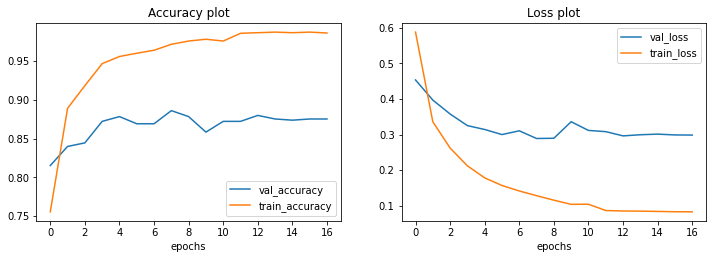

average train accuracy:  0.9536043019855723
max train accuracy:  0.9873466491699219
average train loss:  0.16711849631632075
min train loss:  0.08341851085424423
#########################################################
average train accuracy:  0.8668778328334584
max train accuracy:  0.8861538171768188
average train loss:  0.32308685604263754
min train loss:  0.289271742105484


In [ ]:
# training and testing results
plot_train_evaluation(history1, model1)

In [ ]:
model1.save("/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/baseline-house1.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16  
import tensorflow as tf 
from tensorflow.keras import Model  
from sklearn.metrics import confusion_matrix, classification_report  

In [ ]:
model2 = load_model('/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/baseline-house1.h5')

In [ ]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

**Kettle**

In [ ]:
dir = '//content/gdrive/MyDrive/data-device/UK-DALE-data/diff/building1-diff/train-kettle'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator = train_datagen2.flow_from_directory(
     dir,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict1 = model2.evaluate(train_generator, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 18s 177ms/step - loss: 0.6960 - accuracy: 0.6992


In [ ]:
y_predict1 

{'loss': 0.6959773898124695, 'accuracy': 0.6992019414901733}

**train with kettle**

In [ ]:
model2_retain = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history2 = train(model2_retain)

Epoch 1/50
102/102 [==============================] - 25s 234ms/step - loss: 0.5413 - accuracy: 0.7419 - val_loss: 0.5288 - val_accuracy: 0.7369 - lr: 0.0010
Epoch 2/50
102/102 [==============================] - 24s 231ms/step - loss: 0.3547 - accuracy: 0.8585 - val_loss: 0.5529 - val_accuracy: 0.7785 - lr: 0.0010
Epoch 3/50
102/102 [==============================] - 23s 225ms/step - loss: 0.3093 - accuracy: 0.8742 - val_loss: 0.4895 - val_accuracy: 0.7662 - lr: 0.0010
Epoch 4/50
102/102 [==============================] - 23s 225ms/step - loss: 0.2733 - accuracy: 0.8926 - val_loss: 0.4081 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 5/50
102/102 [==============================] - 23s 227ms/step - loss: 0.2447 - accuracy: 0.9070 - val_loss: 0.4459 - val_accuracy: 0.7862 - lr: 0.0010
Epoch 6/50
102/102 [==============================] - 23s 227ms/step - loss: 0.2353 - accuracy: 0.9076 - val_loss: 0.4045 - val_accuracy: 0.8169 - lr: 0.0010
Epoch 7/50
102/102 [==============================] 

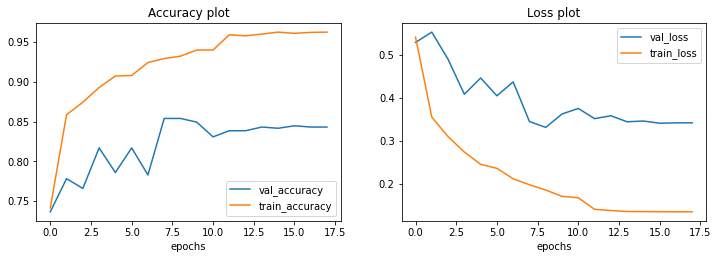

average train accuracy:  0.9203669561280144
max train accuracy:  0.961939811706543
average train loss:  0.21316006862454945
min train loss:  0.13400517404079437
#########################################################
average train accuracy:  0.8202564153406355
max train accuracy:  0.8538461327552795
average train loss:  0.394475143816736
min train loss:  0.3307996988296509


In [ ]:
plot_train_evaluation(history2, model2_retain)

In [ ]:
model3 = load_model('/content/gdrive/MyDrive/data-device/model/baseline.h5')

**Washer Dryer**

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/building1-diff/train-washer'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator = train_datagen.flow_from_directory(
     dir,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict2 = model3.evaluate(train_generator, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 232s 2s/step - loss: 0.1488 - accuracy: 0.9583


In [ ]:
y_predict2

{'loss': 0.14884604513645172, 'accuracy': 0.9582566022872925}

**Retain with Washer**

In [ ]:
model3_retain = pretrained_model(VGG16)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
history3 = train(model3_retain)

Epoch 1/50
41/41 [==============================] - 380s 9s/step - loss: 0.5924 - accuracy: 0.7377 - val_loss: 0.4757 - val_accuracy: 0.7846 - lr: 0.0010
Epoch 2/50
41/41 [==============================] - 19s 459ms/step - loss: 0.3396 - accuracy: 0.8842 - val_loss: 0.3800 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 3/50
41/41 [==============================] - 19s 471ms/step - loss: 0.2601 - accuracy: 0.9271 - val_loss: 0.3483 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 4/50
41/41 [==============================] - 20s 484ms/step - loss: 0.2251 - accuracy: 0.9298 - val_loss: 0.3249 - val_accuracy: 0.8646 - lr: 0.0010
Epoch 5/50
41/41 [==============================] - 20s 490ms/step - loss: 0.1841 - accuracy: 0.9505 - val_loss: 0.3124 - val_accuracy: 0.8769 - lr: 0.0010
Epoch 6/50
41/41 [==============================] - 21s 501ms/step - loss: 0.1635 - accuracy: 0.9559 - val_loss: 0.3353 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 7/50
41/41 [==============================] - 21s 506ms/step

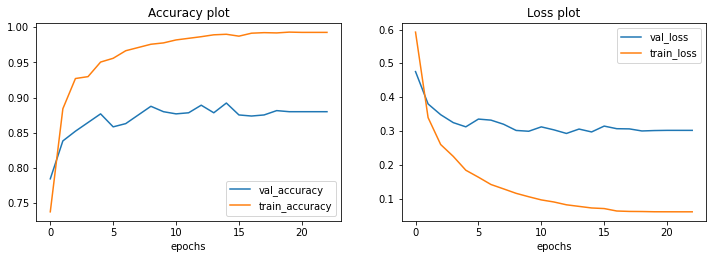

average train accuracy:  0.9627567296442778
max train accuracy:  0.9930981397628784
average train loss:  0.13823910980768825
min train loss:  0.061192430555820465
#########################################################
average train accuracy:  0.8705685657003651
max train accuracy:  0.892307698726654
average train loss:  0.3207326570282812
min train loss:  0.2928513288497925


In [ ]:
plot_train_evaluation(history3, model3_retain)

In [ ]:
model3_retain.save("/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/house1-washer-diff.h5")

### Across House






**Fridge**

In [ ]:
model4 = load_model('/content/gdrive/MyDrive/data-device/model/baseline.h5')

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-fridge'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator = train_datagen.flow_from_directory(
     dir,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict4 = model4.evaluate(train_generator, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 434s 4s/step - loss: 0.1590 - accuracy: 0.9515


In [ ]:
y_predict4

{'loss': 0.15904501080513, 'accuracy': 0.9515039920806885}

**Retain-fridge**

In [ ]:
model4_retain = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history4 = train(model4_retain)

Epoch 1/50
102/102 [==============================] - 1643s 16s/step - loss: 0.4116 - accuracy: 0.8278 - val_loss: 0.4020 - val_accuracy: 0.8138 - lr: 0.0010
Epoch 2/50
102/102 [==============================] - 24s 231ms/step - loss: 0.2022 - accuracy: 0.9365 - val_loss: 0.2767 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 3/50
102/102 [==============================] - 23s 226ms/step - loss: 0.1466 - accuracy: 0.9549 - val_loss: 0.2925 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 4/50
102/102 [==============================] - 23s 223ms/step - loss: 0.1214 - accuracy: 0.9610 - val_loss: 0.2376 - val_accuracy: 0.8923 - lr: 0.0010
Epoch 5/50
102/102 [==============================] - 23s 226ms/step - loss: 0.0984 - accuracy: 0.9687 - val_loss: 0.2171 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 6/50
102/102 [==============================] - 23s 229ms/step - loss: 0.0940 - accuracy: 0.9699 - val_loss: 0.4113 - val_accuracy: 0.8046 - lr: 0.0010
Epoch 7/50
102/102 [==============================] 

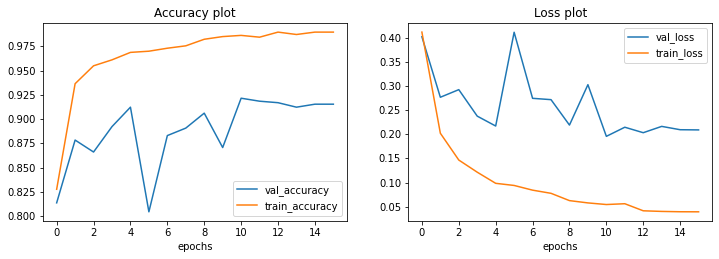

average train accuracy:  0.9662944935262203
max train accuracy:  0.9895641207695007
average train loss:  0.10173173039220273
min train loss:  0.03937060013413429
#########################################################
average train accuracy:  0.8886538445949554
max train accuracy:  0.9215384721755981
average train loss:  0.2595966625958681
min train loss:  0.19570878148078918


In [ ]:
plot_train_evaluation(history4, model4_retain)

In [ ]:
model4_retain.save("/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/acrosshouse-fridge.h5")

**Kettle**

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-kettle'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator = train_datagen.flow_from_directory(
     dir,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict5 = model4.evaluate(train_generator5, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 298s 3s/step - loss: 2.0807 - accuracy: 0.3149


In [ ]:
y_predict5

{'loss': 2.0807077884674072, 'accuracy': 0.31491711735725403}

**Retain Kattle**

In [ ]:
model5_retain = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history5 = train(model5_retain)

Epoch 1/50
102/102 [==============================] - 1065s 10s/step - loss: 0.5746 - accuracy: 0.6946 - val_loss: 1.1711 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 2/50
102/102 [==============================] - 22s 218ms/step - loss: 0.4074 - accuracy: 0.8180 - val_loss: 1.5712 - val_accuracy: 0.3631 - lr: 0.0010
Epoch 3/50
102/102 [==============================] - 23s 227ms/step - loss: 0.3669 - accuracy: 0.8312 - val_loss: 1.6369 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 4/50
102/102 [==============================] - 23s 230ms/step - loss: 0.3185 - accuracy: 0.8646 - val_loss: 1.9287 - val_accuracy: 0.3354 - lr: 0.0010
Epoch 5/50
102/102 [==============================] - 23s 225ms/step - loss: 0.2973 - accuracy: 0.8738 - val_loss: 1.9924 - val_accuracy: 0.2662 - lr: 0.0010
Epoch 6/50
102/102 [==============================] - 23s 224ms/step - loss: 0.2579 - accuracy: 0.8975 - val_loss: 1.9507 - val_accuracy: 0.1892 - lr: 0.0010
Epoch 7/50
102/102 [==============================] 

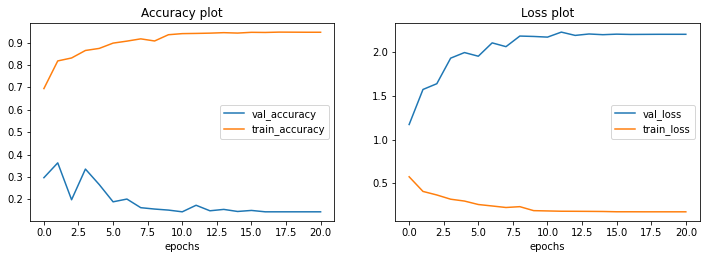

average train accuracy:  0.906150431860061
max train accuracy:  0.9465929865837097
average train loss:  0.24106468118372418
min train loss:  0.1746070832014084
#########################################################
average train accuracy:  0.18886446668988183
max train accuracy:  0.36307692527770996
average train loss:  2.0456710940315608
min train loss:  1.1710854768753052


In [ ]:
plot_train_evaluation(history5, model5_retain)

In [ ]:
model5_retain.save("/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/acrosshouse-kattle.h5")

**Washer Dryer**

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-washer'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator = train_datagen.flow_from_directory(
     dir,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict6 = model4.evaluate(train_generator, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 434s 4s/step - loss: 0.1479 - accuracy: 0.9586


In [ ]:
y_predict6

{'loss': 0.14791391789913177, 'accuracy': 0.958563506603241}

**Retain with Washer Dryer**

In [ ]:
model6_retain = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history6 = train(model6_retain)

Epoch 1/50
102/102 [==============================] - 406s 4s/step - loss: 0.4617 - accuracy: 0.7904 - val_loss: 0.3501 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 2/50
102/102 [==============================] - 22s 213ms/step - loss: 0.2539 - accuracy: 0.9107 - val_loss: 0.2765 - val_accuracy: 0.8969 - lr: 0.0010
Epoch 3/50
102/102 [==============================] - 22s 217ms/step - loss: 0.1961 - accuracy: 0.9371 - val_loss: 0.2389 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 4/50
102/102 [==============================] - 23s 227ms/step - loss: 0.1653 - accuracy: 0.9521 - val_loss: 0.2212 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 5/50
102/102 [==============================] - 23s 223ms/step - loss: 0.1361 - accuracy: 0.9626 - val_loss: 0.2197 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 6/50
102/102 [==============================] - 23s 228ms/step - loss: 0.1188 - accuracy: 0.9687 - val_loss: 0.1915 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 7/50
102/102 [==============================] - 

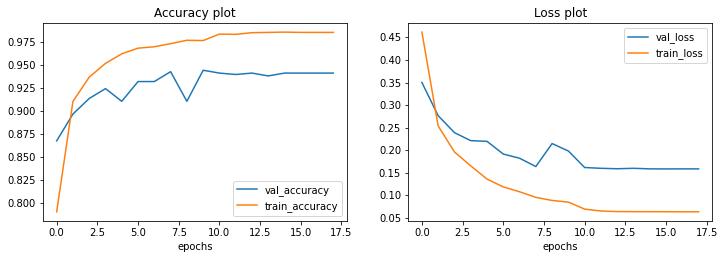

average train accuracy:  0.9612577557563782
max train accuracy:  0.9861878156661987
average train loss:  0.12368378457095888
min train loss:  0.0635218545794487
#########################################################
average train accuracy:  0.928034183051851
max train accuracy:  0.944615364074707
average train loss:  0.19622352553738487
min train loss:  0.15855319797992706


In [ ]:
plot_train_evaluation(history6, model6_retain)

## REDD

### Building1

**fridge**

In [ ]:
dir7 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/building1/train-fridge'
train_datagen7 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator7 = train_datagen7.flow_from_directory(
     dir7,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict7 = model4.evaluate(train_generator7, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 10s 5s/step - loss: 1.0809 - accuracy: 0.4861


In [ ]:
y_predict7

{'loss': 1.0808768272399902, 'accuracy': 0.4861111044883728}

**microwave**

In [ ]:
dir8 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/building1/train-microwave'
train_datagen8 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator8 = train_datagen8.flow_from_directory(
     dir8,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict8 = model4.evaluate(train_generator8, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 7s 4s/step - loss: 1.0985 - accuracy: 0.4861


In [ ]:
y_predict8

{'loss': 1.0984779596328735, 'accuracy': 0.4861111044883728}

**Washer Dryer**

In [ ]:
dir9 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/building1/train-washer'
train_datagen9 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator9 = train_datagen9.flow_from_directory(
     dir9,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
y_predict9 = model4.evaluate(train_generator9, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 1s 132ms/step - loss: 1.0906 - accuracy: 0.4861


In [ ]:
y_predict9

{'loss': 1.0905508995056152, 'accuracy': 0.4861111044883728}

###Across House

**fridge**

In [ ]:
dir10 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg/train-fridge'
train_datagen10 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator10 = train_datagen10.flow_from_directory(
     dir10,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict10 = model4.evaluate(train_generator10, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 7s 3s/step - loss: 0.8116 - accuracy: 0.5833


**Microwave**

In [ ]:
dir11 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg/train-microwave'
train_datagen11 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator11 = train_datagen11.flow_from_directory(
     dir11,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [ ]:
y_predict11 = model4.evaluate(train_generator11, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 8s 4s/step - loss: 1.0315 - accuracy: 0.5139


In [ ]:
y_predict11 

{'loss': 1.0315206050872803, 'accuracy': 0.5138888955116272}

**Washer Dryer**

In [ ]:
dir12 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg/train-washer'
train_datagen12 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator12 = train_datagen12.flow_from_directory(
     dir12,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [ ]:
y_predict12 = model4.evaluate(train_generator12, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 7s 3s/step - loss: 1.0585 - accuracy: 0.4861


In [ ]:
y_predict12

{'loss': 1.0585179328918457, 'accuracy': 0.4861111044883728}